In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

model = tf.keras.models.load_model('./model_nou.keras')

def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [38]:
def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = heatmap_color * alpha + img
    superimposed_img = np.clip(superimposed_img, 0, 255).astype(np.uint8)

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Imagine originală")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.title("Grad-CAM")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

In [39]:
from tensorflow.keras.preprocessing import image
import numpy as np
def generate_gradcam(img_path, model, last_conv_layer_name="conv5_block3_out"):

    # Încarcă imaginea și preprocesează
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    # Generează heatmap
    heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

    # Afișează imaginea originală + Grad-CAM
    display_gradcam(img_path, heatmap)

In [40]:
img_path2 = '/Users/constantinmierla/Informatica/deepbreath/ai-projects-deepbreath-ai/dataset/preprocessed_dataset/train_augmented/adenocarcinoma/aug_0_000080 (6)_0_1007.jpg'
img_path = '/dataset/preprocessed_dataset/train_augmented/large_cell_carcinoma/aug_0_000057.png'
p = '/Users/constantinmierla/Informatica/deepbreath/ai-projects-deepbreath-ai/dataset/preprocessed_dataset/train_augmented/squamous_cell_carcinoma/aug_0_000002 (4).png'
n = '/Users/constantinmierla/Informatica/deepbreath/ai-projects-deepbreath-ai/dataset/preprocessed_dataset/train_augmented/normal/aug_0_aug_0_20 - Copy_0_4638.jpg'
n2 = '/Users/constantinmierla/Informatica/deepbreath/ai-projects-deepbreath-ai/dataset/preprocessed_dataset/train_augmented/normal/aug_3_10_0_8245.jpg'

adenocarcinoma


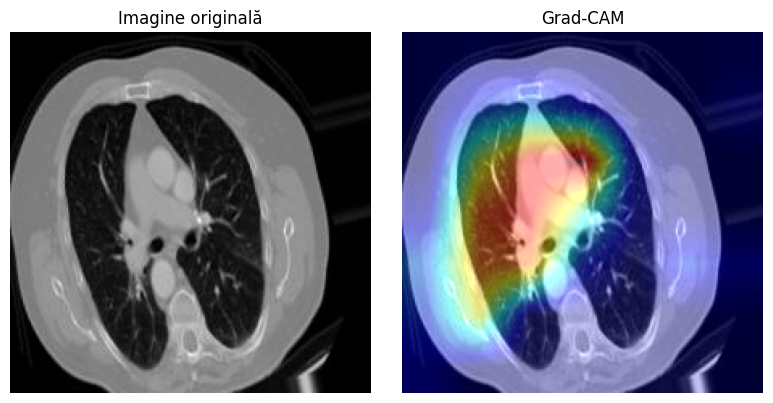

large_cell_carcinoma


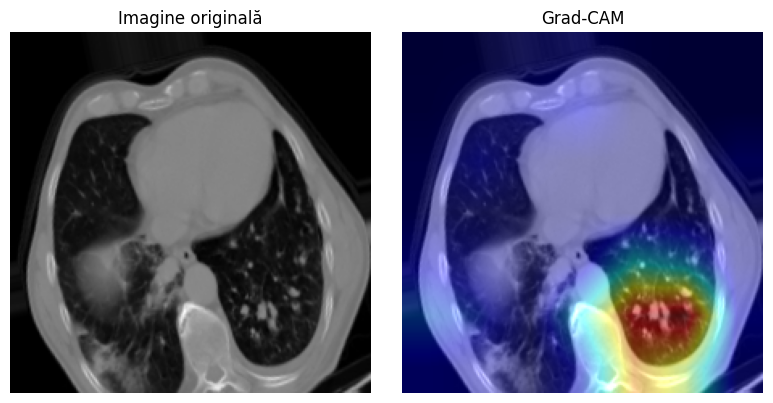

squamous_cell_carcinoma


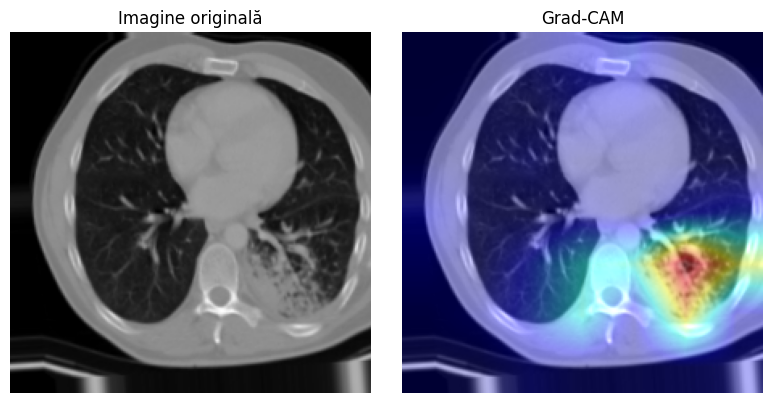

normal


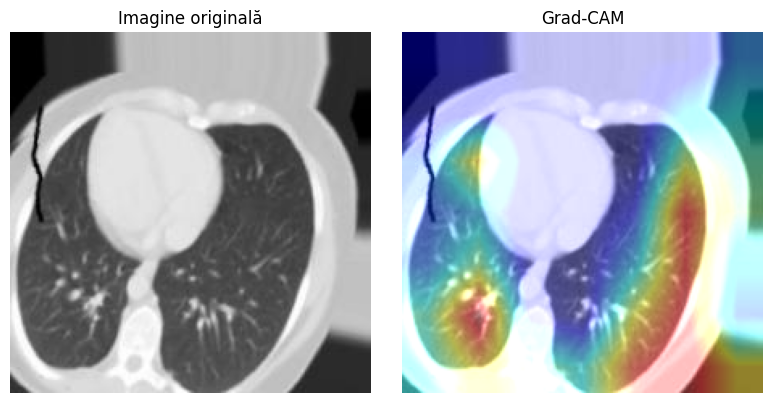

normal2


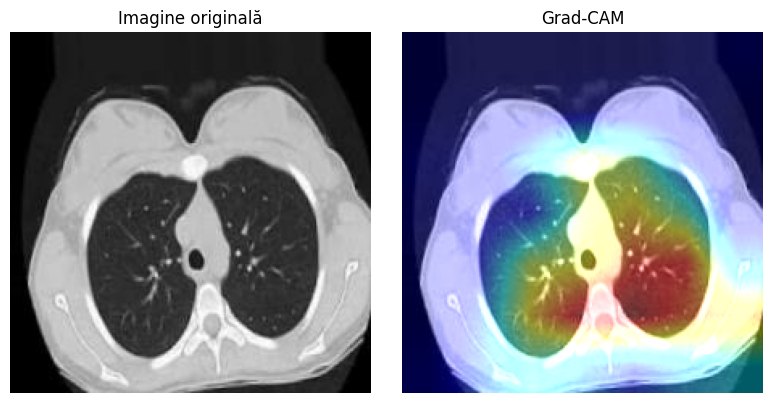

In [42]:
print('adenocarcinoma')
generate_gradcam(img_path2, model, last_conv_layer_name="conv5_block3_out")
print('large_cell_carcinoma')
generate_gradcam(img_path, model, last_conv_layer_name="conv5_block3_out")
print('squamous_cell_carcinoma')
generate_gradcam(p, model, last_conv_layer_name="conv5_block3_out")
print('normal')
generate_gradcam(n, model, last_conv_layer_name="conv5_block3_out")
print('normal2')
generate_gradcam(n2, model, last_conv_layer_name="conv5_block3_out")